In [1]:
import yfinance as yf 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [52]:
df = yf.download('ETH-USD',start='2018-01-01')

[*********************100%***********************]  1 of 1 completed


In [53]:
def strategy(df,sma1,sma2):
    '''
    sma1: Short term
    sma2: Long term
    '''
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change()+1) # current date / previous date
    df['SMA1'] = df.Close.rolling(sma1).mean()
    df['SMA2'] = df.Close.rolling(sma2).mean()
    df = df.dropna()
    df['position'] = np.where(df['SMA1']> df['SMA2'],1,0) #when condition filled hold the asset 
    df['stratret'] = df['position'].shift(1) * df['ret']
    df = df.dropna()
    return df

In [54]:
def performance(df):
     return np.exp(df[['ret','stratret']].sum()) #turning the log returns into real returns

In [55]:
performance(strategy(df,20,50))

ret          4.098668
stratret    10.910864
dtype: float64

In [56]:
stratdf = strategy(df,20,50)

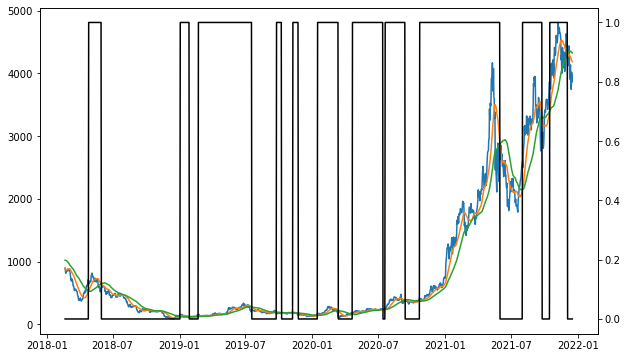

In [57]:
fix, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
ax.plot(stratdf[['Close','SMA1','SMA2']])
ax2.plot(stratdf['position'], color='k')

In [58]:
SMA_list1 = range(5,101,5)
SMA_list2 = range(105,201,5)

def Tester(SMAlist1,SMAlist2):
    profits = []
    a,b = [],[]
    #comparison
    for i,e in zip(SMA_list1,SMA_list2):
        profit = performance(strategy(df,i,e))
        profits.append(profit)
        a.append(i)
        b.append(e)
    col = {'level_0':'SMA1','level_1':'SMA2'}
    frame = pd.DataFrame(profits,[a,b]).reset_index().rename(columns=col)
    frame['edge'] = frame.stratret - frame.ret
    return frame.sort_values('edge',ascending=False)

In [59]:
Tester(SMA_list1,SMA_list2)

,SMA1,SMA2,ret,stratret,edge
19,100,200,8.237720,20.431017,12.193297
17,90,190,8.115661,18.872515,10.756854
15,80,180,8.872729,18.906547,10.033818
18,95,195,8.871162,18.023001,9.151838
16,85,185,8.278281,17.238567,8.960286
4,25,125,4.740222,13.316934,8.576712
5,30,130,5.319280,13.403633,8.084354
6,35,135,5.457396,12.960726,7.503330
0,5,105,7.275860,14.015887,6.740026
1,10,110,6.283054,12.829057,6.546003
